5. Mettre en œuvre une AFD sur $\mathbb{R}^p$ :
(a) En utilisant les données train de la partie 2(a):
i. A partir de votre code sous $\mathrm{R}$ ou Python : fournir les matrices $V$ matrice $B$ et la matrice $W$ et la matrice de variance-covariance totale $\Sigma$.

ii. Vous disposez d'un script qui vous permet de 1) calculer la diagonalisation de la matrice $\Sigma^{-1} B$ ou plus exactement obtenir les valeurs propres et les vecteurs associés $U, 2$ ) de faire la projection des individus dans ce nouvel espace. Pour finaliser l'AFD vous pouvez utiliser un de packages sous $\mathrm{R}$ disponibles.

iii. Tester la réduction par AFD : tester plusieurs règles pour sélectionner la part d'inertie expliquée et fournir la dimension $k<p$ de réduction retenue.

iv. Visualisez le nuage des $n$ points dans les premiers plans retenus en mettant une couleur associée à chacune des classes.

(b) En utilisant les données test de la partie 2(a) : donner la qualité de la projection des individus test sur les $k$ composantes : quels sont les 10 individus les plus mal projetés dans le nuage?Comparer vos résultats obtenus par l'ACP.


6. Mise en ceuvre de l'AFD prédictive :

(a) En utilisant le modèle entraîné de la partie 5(a), mettre en œuvre la fonction discriminante prédictive sur les données test et comparer avec la matrice de confusion de l'arbre de décision.

(b) Puis mettre en cuvre un arbre de décision et une AFD sur les données réduites après ACP (partie 4 ) et comparer les matrices de confusion sur les données tests. Comparer vos résultats obtenus par l'arbre de décision et l'AFD des parties (2) et (5).

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


data=pd.read_csv('Income_Inequality.csv',sep=';')
np.random.seed(1234)


X = data.drop('Income_Inequality', axis=1)
y = data['Income_Inequality']
y = np.where(np.array(y) == 'H', 1, 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

i. A partir de votre code sous $\mathrm{R}$ ou Python : fournir les matrices $V$ matrice $B$ et la matrice $W$ et la matrice de variance-covariance totale $\Sigma$.

In [39]:
X_train.shape

(609, 21)

In [40]:
data.columns

Index(['Country', 'Year', 'Income_Inequality', 'Eco1', 'Eco2', 'Eco3',
       'Energy1', 'Energy2', 'Energy3', 'Health1', 'Health2', 'Finan1',
       'Finan2', 'Finan3', 'Finan4', 'Finan5', 'Governance', 'Poverty', 'Env',
       'Other1', 'Other2', 'Other3'],
      dtype='object')

### Step 1: Computing the d-dimensional mean vectors
In this first step, we will start off with a simple computation of the mean vectors $\boldsymbol{m}_i,(i=0,1)$ of the 2 different classes:
$$
\boldsymbol{m}_i=\left[\begin{array}{l}
\mu_{\omega_i \text { (H) }} \\
\mu_{\omega_i \text { (L) }}
\end{array}\right], \quad \text { with } \quad i=0,1
$$

In [41]:
mean_vectors = []
for cl in range(0,2):
    mean_vectors.append(np.mean(X_train[y_train==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 0: Country       4.215126e+01
Year          2.014613e+03
Eco1          2.966825e+04
Eco2          2.402376e+04
Eco3          3.439637e+04
Energy1       6.519328e+01
Energy2       9.845135e+01
Energy3       9.501496e+01
Health1       9.966387e+00
Health2       1.903887e+00
Finan1        5.566987e-01
Finan2        4.750898e+06
Finan3        7.616387e-01
Finan4        3.290118e+00
Finan5        7.469976e-01
Governance    8.204906e-01
Poverty       1.022052e+01
Env           7.595755e+00
Other1        3.736814e+00
Other2        1.088567e+01
Other3        5.063388e+00
dtype: float64

Mean Vector class 1: Country       4.215126e+01
Year          2.014613e+03
Eco1          2.966825e+04
Eco2          2.402376e+04
Eco3          3.439637e+04
Energy1       6.519328e+01
Energy2       9.845135e+01
Energy3       9.501496e+01
Health1       9.966387e+00
Health2       1.903887e+00
Finan1        5.566987e-01
Finan2        4.750898e+06
Finan3        7.616387e-01
Finan4        3.290118e+

In [42]:
mean_vectors=[list(mean_vectors[0].values),list(mean_vectors[1].values)]

In [43]:
mean_vectors=[np.array(mean_vectors[0]),np.array(mean_vectors[1])]

### Step 2: Computing the Scatter Matrices
Now, we will compute the two $4 \times 4$-dimensional matrices: The within-class and the between-class scatter matrix
2.1 Within-class scatter matrix $S_W$

The within-class scatter matrix $S_W$ is computed by the following equation:
$$
S_W=\sum_{i=1}^c S_i
$$
where
$$
S_i=\sum_{\boldsymbol{x} \in D_i}^n\left(\boldsymbol{x}-\boldsymbol{m}_i\right)\left(\boldsymbol{x}-\boldsymbol{m}_i\right)^T
$$
(scatter matrix for every class)
and $\boldsymbol{m}_i$ is the mean vector
$$
\boldsymbol{m}_i=\frac{1}{n_i} \sum_{\boldsymbol{x} \in D_i}^n \boldsymbol{x}_k
$$

In [44]:
S_W = np.zeros((X_train.shape[1],X_train.shape[1]))
for cl,mv in zip(range(0,2), mean_vectors):
    class_sc_mat = np.zeros((21,21))                  # scatter matrix for every class
    for row in X_train[y_train == cl].values:
        row, mv = row.reshape(21,1), mv.reshape(21,1) # make column vectors
        print(mv)
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

[[4.21512605e+01]
 [2.01461345e+03]
 [2.96682521e+04]
 [2.40237618e+04]
 [3.43963689e+04]
 [6.51932773e+01]
 [9.84513477e+01]
 [9.50149580e+01]
 [9.96638655e+00]
 [1.90388655e+00]
 [5.56698739e-01]
 [4.75089801e+06]
 [7.61638686e-01]
 [3.29011830e+00]
 [7.46997563e-01]
 [8.20490648e-01]
 [1.02205213e+01]
 [7.59575489e+00]
 [3.73681420e+00]
 [1.08856723e+01]
 [5.06338797e+00]]
[[4.21512605e+01]
 [2.01461345e+03]
 [2.96682521e+04]
 [2.40237618e+04]
 [3.43963689e+04]
 [6.51932773e+01]
 [9.84513477e+01]
 [9.50149580e+01]
 [9.96638655e+00]
 [1.90388655e+00]
 [5.56698739e-01]
 [4.75089801e+06]
 [7.61638686e-01]
 [3.29011830e+00]
 [7.46997563e-01]
 [8.20490648e-01]
 [1.02205213e+01]
 [7.59575489e+00]
 [3.73681420e+00]
 [1.08856723e+01]
 [5.06338797e+00]]
[[4.21512605e+01]
 [2.01461345e+03]
 [2.96682521e+04]
 [2.40237618e+04]
 [3.43963689e+04]
 [6.51932773e+01]
 [9.84513477e+01]
 [9.50149580e+01]
 [9.96638655e+00]
 [1.90388655e+00]
 [5.56698739e-01]
 [4.75089801e+06]
 [7.61638686e-01]
 [3.2901

S_W

$2.1 \mathrm{~b}$
Alternatively, we could also compute the class-covariance matrices by adding the scaling factor $\frac{1}{N-1}$ to the within-class scatter matrix, so that our equation becomes
$$
\begin{aligned}
& \Sigma_i=\frac{1}{N_i-1} \sum_{\boldsymbol{x} \in D_i}^n\left(\boldsymbol{x}-\boldsymbol{m}_i\right)\left(\boldsymbol{x}-\boldsymbol{m}_i\right)^T \\
& \text { and } S_W=\sum_{i=1}^c\left(N_i-1\right) \Sigma_i
\end{aligned}
$$
where $N_i$ is the sample size of the respective class (here: 50 ), and in this particular case, we can drop the term $\left(N_i-1\right)$ since all classes have the same sample size.

However, the resulting eigenspaces will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).

#### 2.2 Between-class scatter matrix $S_B$

The between-class scatter matrix $S_B$ is computed by the following equation:
$$
S_B=\sum_{i=1}^c N_i\left(\boldsymbol{m}_i-\boldsymbol{m}\right)\left(\boldsymbol{m}_i-\boldsymbol{m}\right)^T
$$
where
$\boldsymbol{m}$ is the overall mean, and $\boldsymbol{m}_i$ and $N_i$ are the sample mean and sizes of the respective classes.

In [45]:
overall_mean = np.mean(X_train, axis=0)
overall_mean.values

array([4.49359606e+01, 2.01446305e+03, 1.60455307e+04, 1.56412358e+04,
       2.15803765e+04, 5.13087028e+01, 8.50329249e+01, 9.06160755e+01,
       2.72868637e+01, 2.64644417e+00, 4.03750118e-01, 4.49575817e+06,
       6.03863303e-01, 2.73014616e+00, 6.40844401e-01, 1.97450062e-01,
       2.63371896e+01, 4.89703611e+00, 5.17559830e+00, 1.51381445e+01,
       4.57783915e+00])

In [46]:
overall_mean = np.mean(X_train, axis=0).values

S_B = np.zeros((21,21))
for i,mean_vec in enumerate(mean_vectors):  
    n = X_train[y_train==i].shape[0]
    mean_vec = mean_vec.reshape(21,1) # make column vector
    overall_mean = overall_mean.reshape(21,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 3.02954353e+03 -1.63614265e+02 -1.48204928e+07 -9.11955568e+06
  -1.39428324e+07 -1.51053692e+04 -1.45982313e+04 -4.78565211e+03
   1.88433719e+04  8.07846644e+02 -1.66396557e+02 -2.77572895e+08
  -1.71647709e+02 -6.09207422e+02 -1.15486628e+02 -6.77821135e+02
   1.75337188e+04 -2.93600236e+03  1.56528851e+03  4.62636885e+03
  -5.28240466e+02]
 [-1.63614265e+02  8.83619186e+00  8.00399143e+05  4.92512945e+05
   7.53000004e+05  8.15784246e+02  7.88395635e+02  2.58455093e+02
  -1.01765973e+03 -4.36287626e+01  8.98645296e+00  1.49906693e+07
   9.27004798e+00  3.29010044e+01  6.23699895e+00  3.66065733e+01
  -9.46930284e+02  1.58562458e+02 -8.45353523e+01 -2.49852802e+02
   2.85282832e+01]
 [-1.48204928e+07  8.00399143e+05  7.25016837e+10  4.46127636e+10
   6.82081791e+10  7.38952958e+07  7.14143830e+07  2.34113562e+07
  -9.21815631e+07 -3.95197668e+06  8.14010080e+05  1.35788347e+12
   8.39698659e+05  2.98023584e+06  5.64959283e+05  3.31589335e+06
  -8.57

In [47]:
S_B.shape

(21, 21)

### Step 3: Solving the generalized eigenvalue problem for the matrix $V^{-1} S_B$

Next, we will solve the generalized eigenvalue problem for the matrix $V^{-1} S_B$ to obtain the linear discriminants.

* $V=S_B+S_W$

In [48]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W+S_B).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(21,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 2.12723668e-03]
 [ 1.35681943e-02]
 [-1.38607885e-05]
 [ 3.79300078e-05]
 [-6.47687888e-06]
 [ 5.85737084e-04]
 [ 8.21063726e-03]
 [-1.68104676e-03]
 [-3.73906538e-03]
 [-9.50719317e-02]
 [-4.59027043e-01]
 [ 4.53671724e-09]
 [ 6.16951836e-01]
 [-6.17870610e-01]
 [ 6.15627296e-02]
 [-1.04435603e-01]
 [ 2.98794081e-02]
 [ 1.30097135e-02]
 [ 1.26136575e-04]
 [ 6.50273030e-04]
 [-4.27717431e-02]]
Eigenvalue 1: 6.20e-01

Eigenvector 2: 
[[-1.19104189e-03]
 [ 9.66943526e-02]
 [ 6.80889437e-05]
 [ 7.75185547e-06]
 [-1.22015371e-04]
 [ 3.96906060e-03]
 [ 2.08887845e-02]
 [ 1.43455579e-03]
 [ 2.21829390e-03]
 [ 7.74197312e-02]
 [ 6.35635168e-02]
 [-1.98588905e-09]
 [-8.93137238e-01]
 [ 3.24034884e-01]
 [-2.35163362e-01]
 [ 1.42870197e-01]
 [-8.00249653e-03]
 [ 3.49202413e-02]
 [ 6.48662086e-03]
 [ 2.40040233e-03]
 [-2.04406752e-02]]
Eigenvalue 2: 3.01e-15

Eigenvector 3: 
[[-2.18146650e-04]
 [ 3.04082759e-02]
 [-7.27527910e-06]
 [-3.94251144e-05]
 [ 5.00022245e-06]
 [ 5.555

Note
Depending on which version of NumPy and LAPACK we are using, we may obtain the matrix $\mathbf{W}$ with $\mathrm{i}$ signs flipped. Please note that this is not an issue; if $\mathbf{v}$ is an eigenvector of a matrix $\Sigma$, we have
$$
\Sigma \mathbf{v}=\lambda \mathbf{v}
$$

Here, $\lambda$ is the eigenvalue, and $\mathbf{v}$ is also an eigenvector that thas the same eigenvalue, since
$$
\operatorname{Sigma}(-\mathbf{v})=--\mathbf{v} \Sigma=-\lambda \mathbf{v}=\lambda(-\mathbf{v})
$$

After this decomposition of our square matrix into eigenvectors and eigenvalues, let us briefly recapitulate how we can interpret those results. As we remember from our first linear algebra class in high school or college, both eigenvectors and eigenvalues are providing us with information about the distortion of a linear transformation: The eigenvectors are basically the direction of this distortion, and the eigenvalues are the scaling factor for the eigenvectors that describing the magnitude of the distortion.

If we are performing the LDA for dimensionality reduction, the eigenvectors are important since they wil form the new axes of our new feature subspace; the associated eigenvalues are of particular interest since they will tell us how "informative" the new "axes" are.

Let us briefly double-check our calculation and talk more about the eigenvalues in the next section.
Checking the eigenvector-eigenvalue calculation
A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:
$$
\boldsymbol{A v}=\lambda \boldsymbol{v}
$$
where
$$
\begin{aligned}
& \boldsymbol{A}=V^{-1} S_B \\
& \boldsymbol{v}=\text { Eigenvector } \\
& \lambda=\text { Eigenvalue }
\end{aligned}
$$

In [49]:
len(eig_vals)

21

### Step 4: Selecting linear discriminants for the new feature subspace # 
4.1. Sorting the eigenvectors by decreasing eigenvalues # 
Remember from the introduction that we are not only interested in merely projecting the data into a subspace that improves the class separability, but also reduces the dimensionality of our feature space, (where the eigenvectors will form the axes of this new feature subspace).

However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$
 eigenvectors.

In [50]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.6195440087721571
3.0117725501197976e-15
2.437117659321142e-15
2.437117659321142e-15
1.7543428538626059e-15
9.105361680428192e-16
8.227048427355723e-16
8.227048427355723e-16
6.673252718576029e-16
6.673252718576029e-16
4.330154199467263e-16
3.472510674718752e-16
3.472510674718752e-16
2.7625101512500725e-16
2.0635557531220523e-16
1.2352954953522923e-16
9.255127094797362e-17
5.332036517752791e-17
2.9908560240436603e-17
2.5477879806010358e-17
4.302134258793048e-18


Note

If we take a look at the eigenvalues, we can already see that 20 eigenvalues are close to 0. The reason why these are close to 0 is not that they are not informative but it’s due to floating-point imprecision. In fact, these 20 eigenvalues should be exactly zero: In LDA, the number of linear discriminants is at most c−1 where c is the number of class labels.

Note that in the rare case of perfect collinearity (all aligned sample points fall on a straight line), the covariance matrix would have rank one, which would result in only one eigenvector with a nonzero eigenvalue.

Now, let’s express the “explained variance” as percentage:

In [51]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%
eigenvalue 20: 0.00%
eigenvalue 21: 0.00%


The first eigenpair is by far the most informative one, and we won’t loose much information if we would form a 1D-feature spaced based on this eigenpair.

4.2. Choosing $k$ eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $d \times k$-dimensional eigenvector matrix $\boldsymbol{W}$ (here $21 \times 2$ : based on the 2 most informative eigenpairs) and thereby reducing the initial 21-dimensional feature space into a 2-dimensional feature subspace.


### Step 5: Transforming the samples onto the new subspace

In the last step, we use the $21 \times 2$-dimensional matrix $\boldsymbol{W}$ that we just computed to transform our samples onto the new subspace via the equation
$$
\boldsymbol{Y}=\boldsymbol{X} \times \boldsymbol{W}
$$
(where $\boldsymbol{X}$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\boldsymbol{Y}$ are the transformed $n \times k$ -dimensional samples in the new subspace).

In [52]:
W = np.hstack((eig_pairs[0][1].reshape(21,1), eig_pairs[1][1].reshape(21,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 2.12723668e-03 -1.19104189e-03]
 [ 1.35681943e-02  9.66943526e-02]
 [-1.38607885e-05  6.80889437e-05]
 [ 3.79300078e-05  7.75185547e-06]
 [-6.47687888e-06 -1.22015371e-04]
 [ 5.85737084e-04  3.96906060e-03]
 [ 8.21063726e-03  2.08887845e-02]
 [-1.68104676e-03  1.43455579e-03]
 [-3.73906538e-03  2.21829390e-03]
 [-9.50719317e-02  7.74197312e-02]
 [-4.59027043e-01  6.35635168e-02]
 [ 4.53671724e-09 -1.98588905e-09]
 [ 6.16951836e-01 -8.93137238e-01]
 [-6.17870610e-01  3.24034884e-01]
 [ 6.15627296e-02 -2.35163362e-01]
 [-1.04435603e-01  1.42870197e-01]
 [ 2.98794081e-02 -8.00249653e-03]
 [ 1.30097135e-02  3.49202413e-02]
 [ 1.26136575e-04  6.48662086e-03]
 [ 6.50273030e-04  2.40040233e-03]
 [-4.27717431e-02 -2.04406752e-02]]


In [53]:
W.shape

(21, 2)

In [54]:
X_lda = X_train.dot(W)
X_lda.shape

(609, 2)

In [55]:
X_lda.iloc[:,0].values.real[y_train == 1].shape

(371,)

In [56]:
label_dict = {0: 'L', 1: 'H'}

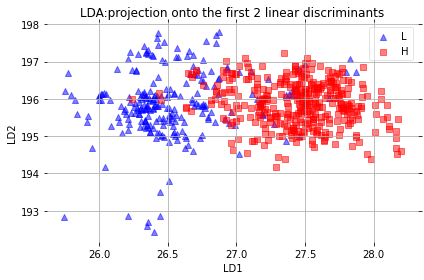

In [135]:
def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0, 2), ('^', 's'), ('blue', 'red')):
        plt.scatter(
            x=X_lda.iloc[:, 0].values.real[y_train == label],
            y=X_lda.iloc[:, 1].values.real[y_train == label],
            marker=marker,
            color=color,
            alpha=0.5,
            label=label_dict[label]
        )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA:projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(
        axis="both",
        which="both",
        bottom="off",
        top="off",
        labelbottom="on",
        left="off",
        right="off",
        labelleft="on"
    )

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout()
    plt.show()

plot_step_lda()


In [58]:
tot = sum(eig_vals.real)
discr = [(i / tot) for i in sorted(eig_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

In [59]:
len(cum_discr),len(discr)

(21, 21)

In [61]:
W.shape

(21, 2)

In [62]:
eig_vals=eig_vals.astype('float')

C:\Users\user\AppData\Local\Temp\ipykernel_15284\3153518227.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vals=eig_vals.astype('float')


In [63]:
# Calcul de la part de la variance expliquée par chaque valeur propre
eig_vals = np.array(eig_vals_W)
total_variance = sum(eig_vals_W)
variance_explained = [(i / total_variance) for i in sorted(eig_vals, reverse=True)]

# Cumulative variance explained
cumulative_variance_explained = np.cumsum(variance_explained)

# Sélectionner le nombre de composantes pour une variance cumulée souhaitée (ex : 95%)
k = np.argmax(cumulative_variance_explained >= 0.95) + 1

k

1

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


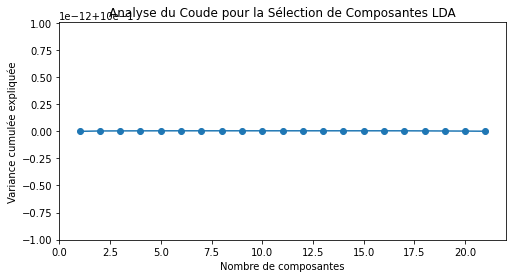

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance_explained)+1), cumulative_variance_explained, marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée expliquée')
plt.title('Analyse du Coude pour la Sélection de Composantes LDA')
plt.show()

In [65]:
# Sélectionner des composantes qui expliquent au moins 10% de variance
k = sum(i >= 0.10 for i in variance_explained)
k

1

la première composante de l'Analyse Discriminante Linéaire (LDA) capture la quasi-totalité de la variance expliquée. Cela signifie que vous pouvez réduire la dimensionnalité des données à  k=1 tout en conservant l'essentiel de l'information qui permet de distinguer les classes. Cela est cohérent avec le principe de l'LDA, qui vise à maximiser la séparation entre les classes. Dans la plupart des cas, en particulier lorsque les classes sont bien séparées, la première composante linéaire discriminante suffit pour obtenir une bonne séparation.

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


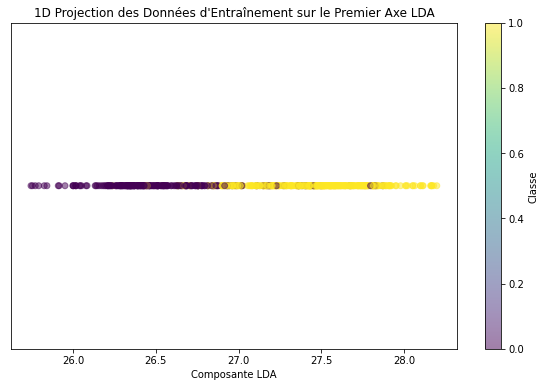

In [67]:
import matplotlib.pyplot as plt

# Project the training data onto the LDA axis
X_lda_1d = X_train.dot(W[:, 0])

# Plot the data with labels
plt.figure(figsize=(10, 6))
plt.scatter(X_lda_1d, [0] * len(X_lda_1d), c=y_train, cmap='viridis', alpha=0.5)
plt.title('1D Projection des Données d\'Entraînement sur le Premier Axe LDA')
plt.xlabel('Composante LDA')
plt.yticks([])
plt.colorbar(label='Classe')
plt.show()

In [68]:
max_index = np.argmax(eig_vals.astype('float'))

C:\Users\user\AppData\Local\Temp\ipykernel_15284\2869268570.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  max_index = np.argmax(eig_vals.astype('float'))


In [143]:
# g_k pour k = 0 et 1
g1 = np.mean(X_train[y_train==0]).values  # le centre de gravité réel de la classe 0
g2 = np.mean(X_train[y_train==1]).values  # le centre de gravité réel de la classe 1

# Vecteur propre associé à la première valeur propre (a_s) pour s = 1
a1 = eig_vecs.astype('float')[max_index]

V = S_W+S_B

# Inverse de la matrice V
V_inv = np.linalg.inv(V)

# Nombre d'individus dans chaque classe (l_k)
l1 = X_train[y_train==0].shape[0]  # le nombre réel d'individus dans la classe 1
l2 = X_train[y_train==1].shape[0]  # le nombre réel d'individus dans la classe 2

# Nombre total d'individus (n)
n = l1 + l2

# Valeurs propres de la matrice Sigma^-1 B (lambda_s)
lambda_s = eig_vals.astype('float') # Remplacez par vos valeurs propres réelles

# Calcul de la qualité de représentation d'un nuage par un axe
quality_representation = lambda_s[0] / sum(lambda_s)

# Contribution absolue du centre de gravité g_k à l'axe s
contrib_abs_g1 = (1/n) * (np.dot(a1.T, np.dot(V_inv, g1)))**2
contrib_abs_g2 = (1/n) * (np.dot(a1.T, np.dot(V_inv, g2)))**2

# Contribution relative du centre de gravité g_k à l'axe s
contrib_rel_g1 = (l1 / (n * lambda_s[0])) * (np.dot(a1.T, np.dot(V_inv, g1)))**2
contrib_rel_g2 = (l2 / (n * lambda_s[0])) * (np.dot(a1.T, np.dot(V_inv, g2)))**2

# Affichage des résultats
print("Qualité de représentation sur l'axe 1:", quality_representation)
print("Contribution absolue du centre de gravité de la classe 1 à l'axe 1:", contrib_abs_g1)
print("Contribution absolue du centre de gravité de la classe 2 à l'axe 1:", contrib_abs_g2)
print("Contribution relative du centre de gravité de la classe 1 à l'axe 1:", contrib_rel_g1)
print("Contribution relative du centre de gravité de la classe 2 à l'axe 1:", contrib_rel_g2)

# Pour trouver les 10 individus les plus mal projetés sur l'axe, vous devez calculer la distance de chaque
# individu test à son centre de gravité de classe respectif dans l'espace projeté et sélectionner les 10 plus grandes distances.
# Supposons que X_test_projected représente les projections des individus test sur l'axe discriminant LDA.
X_test_projected = X_test.dot(W[:, 0])

# Calculer les distances pour chaque classe et trouver les 10 individus les plus éloignés
distances_g1 = np.abs(X_test_projected[y_test==0] - g1[0])  # Pour la classe 0
distances_g2 = np.abs(X_test_projected[y_test==1] - g2[0])  # Pour la classe 1


# Utiliser l'index de X_test pour obtenir les vrais indices des individus
indices_classe_0 = X_test.index[y_test == 0]
indices_classe_1 = X_test.index[y_test == 1]

# Calculer les distances pour chaque individu de l'ensemble de test par rapport à leur centre de gravité de classe
distances_g1 = np.abs(X_test_projected[indices_classe_0] - g1[0])  # Pour la classe 0
distances_g2 = np.abs(X_test_projected[indices_classe_1] - g2[0])  # Pour la classe 1

Qualité de représentation sur l'axe 1: 0.9999999999999987
Contribution absolue du centre de gravité de la classe 1 à l'axe 1: 2.4113555294338734e-06
Contribution absolue du centre de gravité de la classe 2 à l'axe 1: 2.41321611443025e-06
Contribution relative du centre de gravité de la classe 1 à l'axe 1: 0.00035242805280816513
Contribution relative du centre de gravité de la classe 2 à l'axe 1: 0.0005497970336006945


C:\Users\user\AppData\Local\Temp\ipykernel_15284\1550750229.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  a1 = eig_vecs.astype('float')[max_index]
C:\Users\user\AppData\Local\Temp\ipykernel_15284\1550750229.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  lambda_s = eig_vals.astype('float') # Remplacez par vos valeurs propres réelles


In [145]:
# Trouver les indices des 10 plus grandes distances dans l'ensemble de test original
indices_g1 = indices_classe_0[np.argsort(-distances_g1, axis=0)[:10]].values
indices_g2 = indices_classe_1[np.argsort(-distances_g2, axis=0)[:10]].values

# Affichage des indices des 10 individus les plus mal projetés pour chaque classe
print("Indices des 10 individus les plus mal projetés de la classe 0:", indices_g1)
print("Indices des 10 individus les plus mal projetés de la classe 1:", indices_g2)

Indices des 10 individus les plus mal projetés de la classe 0: [146 147 148 143 609 375 230 602 670 216]
Indices des 10 individus les plus mal projetés de la classe 1: [398 397 395 394 393  99  96 738 421 422]


### A comparison of PCA and LDA

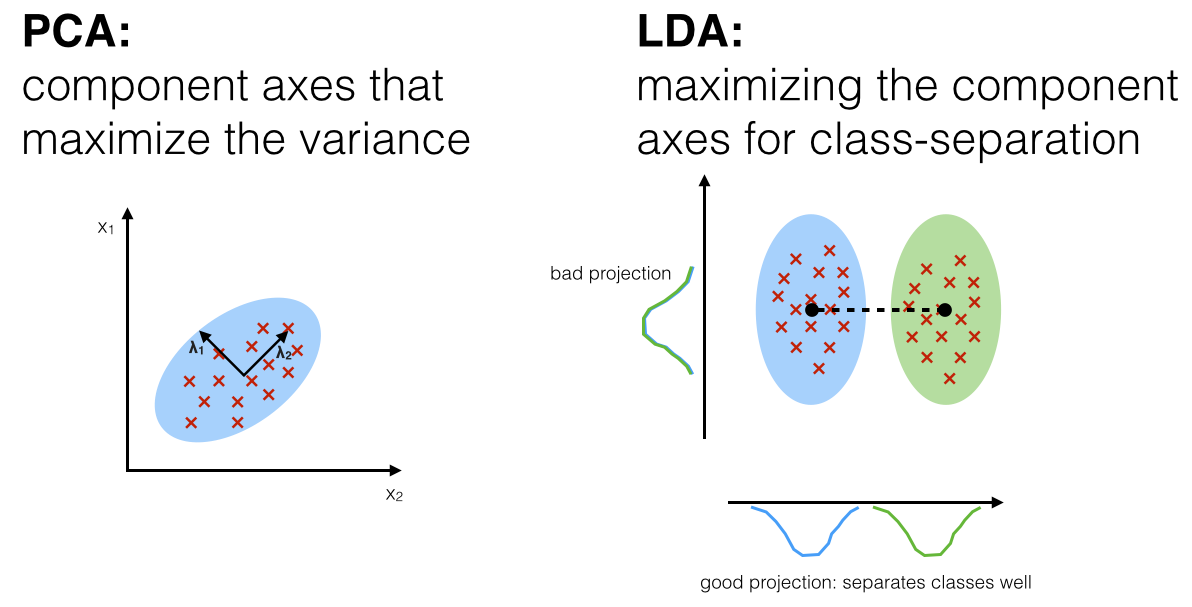

In [118]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X_train)

In [ ]:
x=X_pca[:,0][y_train == 0]
x

In [133]:
def plot_pca():

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_pca[:,0][y_train == label],
                y=X_pca[:,1][y_train == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

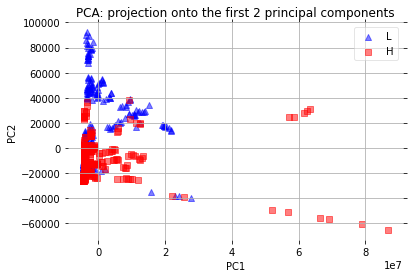

In [134]:
plot_pca()

Our LDA plot :

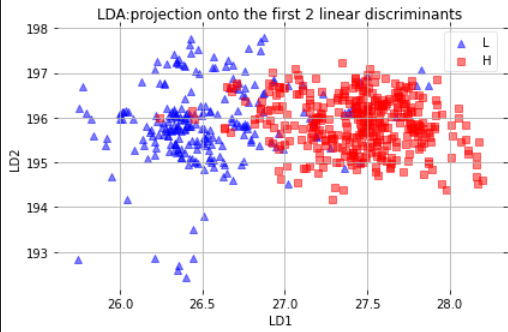

The two plots above nicely confirm what we have discussed before: Where the PCA accounts for the most variance in the whole dataset, the LDA gives us the axes that account for the most variance between the individual classes.

In [160]:
# Entraînez le modèle LDA sur vos données d'entraînement
lda_model = LDA()
lda_model.fit(X_lda.astype('float'), y_train)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


LinearDiscriminantAnalysis()

In [164]:
X_test_lda = X_test.dot(W)
X_test_lda=X_test_lda.values.astype('float')
X_lda.shape

C:\Users\user\AppData\Local\Temp\ipykernel_15284\681174234.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  X_test_lda=X_test_lda.values.astype('float')


(609, 2)

In [166]:
# Prédiction avec le modèle LDA entraîné
y_pred_lda = lda_model.predict(X_test_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
conf_matrix_lda

array([[ 80,  10],
       [ 23, 148]], dtype=int64)

#### Partie 6(b)

In [168]:
# Entraînement de l'arbre de décision sur les données réduites après ACP
tree_model = DecisionTreeClassifier()
tree_model.fit(X_pca, y_train)

DecisionTreeClassifier()

In [170]:
X_test_pca = sklearn_pca.fit_transform(X_test)

In [172]:
# Prédiction avec l'arbre de décision sur les données de test réduites après ACP
y_pred_tree = tree_model.predict(X_test_pca)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_tree

array([[ 61,  29],
       [ 70, 101]], dtype=int64)


         END